# 0.0 Imports

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib              import pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.metrics         import mean_squared_error

from sklearn.linear_model    import LinearRegression

from sklearn.ensemble        import RandomForestRegressor

## 0.1 Load Dataset

In [71]:
train = pd.read_csv('regression_train.csv')

test = pd.read_csv('regression_test.csv')

In [58]:
train.head()

,target,X1,X2,X3,X4,X5,X6,X7
0,NaN,-0.546168,NaN,47.063305,1.611370,-65.882137,0,-16.672865
1,47.735389,3.074317,-2.836000,49.396649,0.261998,-66.570716,0,-6.664599
2,NaN,-1.485531,-13.102537,42.367991,3.991558,-67.108014,8,-30.790962
3,908.202209,6.907396,-0.308967,57.228787,0.256771,-66.181266,5,-0.726072
4,1640.461863,1.916788,3.460290,51.703375,2.463790,-65.143663,5,8.131680


# 1.0 Data Description

## 1.1 Data Dimension

In [5]:
print('Number of rows: {}'.format(train.shape[0]))

print('Number of Columns: {}'.format(train.shape[1]))

Number of rows: 1042
Number of Columns: 8


## 1.2 Check NA

In [6]:
train.isna().sum()

target    327
X1          0
X2         11
X3          0
X4          0
X5          0
X6          0
X7          0
dtype: int64

## 1.3 Data Types

In [7]:
train.dtypes

target    float64
X1        float64
X2        float64
X3        float64
X4        float64
X5        float64
X6          int64
X7        float64
dtype: object

## 1.4 Descriptive Statistics

In [8]:
train.describe()

,target,X1,X2,X3,X4,X5,X6,X7
count,715.000000,1042.000000,1031.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,1349.940229,2.421925,-0.460781,52.094329,2.462871,-65.284233,4.381958,-1.287435
std,1593.201095,3.182976,4.426286,31.374828,2.541632,9.033489,3.290306,11.066380
min,0.062551,-8.699406,-13.651540,38.035456,0.002360,-121.450423,0.000000,-69.835905
25%,230.632308,0.170590,-3.307931,47.087106,0.671196,-69.126630,0.000000,-7.830007
50%,808.374368,2.508671,-0.461150,49.972867,1.652609,-65.360660,5.000000,-1.074191
75%,1849.754221,4.540218,2.406651,52.674305,3.361181,-61.187635,8.000000,5.659476
max,10382.469480,12.380693,12.926106,500.000000,18.813009,53.919202,8.000000,30.376348


## 1.5 Fill NA

In [75]:
#fillna train data
train.interpolate(method='linear', limit_direction='both', inplace=True)

#fillna test data
test.interpolate(method='linear', limit_direction='both', inplace=True)

# 2.0 Feature Importance

<AxesSubplot: >

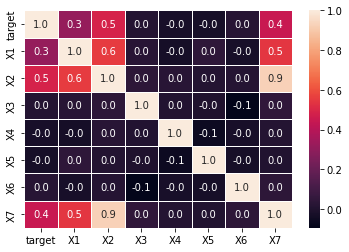

In [96]:
correlation = train.corr()


plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [83]:
# model definition
forest =  RandomForestRegressor(n_estimators=250, random_state=0, n_jobs=-1)

# data preparation
x_train_n = train.drop( ['target'], axis=1 )
y_train_n = train['target']
forest.fit( x_train_n, y_train_n )

RandomForestRegressor(n_estimators=250, n_jobs=-1, random_state=0)

Feature ranking:
  feature  importance
0      X2    0.600850
0      X7    0.198773
0      X1    0.055056
0      X3    0.049637
0      X4    0.048493
0      X5    0.038044
0      X6    0.009147


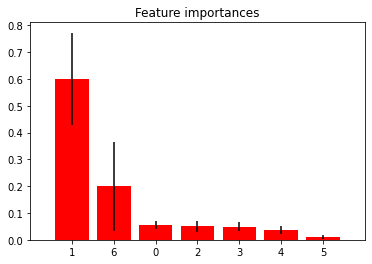

In [84]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
df = pd.DataFrame()
for i, j in zip( x_train_n, forest.feature_importances_ ):
    aux = pd.DataFrame( {'feature': i, 'importance': j}, index=[0] )
    df = pd.concat( [df, aux], axis=0 )
    
print( df.sort_values( 'importance', ascending=False ) )

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train_n.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train_n.shape[1]), indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()

# 3.0 Machine Learning Model

In [85]:
lr = LinearRegression(n_jobs=-1)

In [86]:
X = train.drop('target', axis=1)
y = train['target'].copy()

In [87]:
X_val = test.drop('target', axis=1)
y_val = test['target'].copy()

In [88]:
lr.fit(X, y)

LinearRegression(n_jobs=-1)

In [89]:
yhat = lr.predict(X_val)

In [93]:
scores = cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=5)
#print("RMSE cross-validation score: %.2f" % scores.mean())
scores

array([-1100.12646018, -1291.38759208, -1405.19207033, -1279.3020176 ,
       -1400.14261499])

In [92]:
scores = cross_val_score(lr, X, y, scoring='r2', cv=5)
print("R2 cross-validation score: %.2f" % scores.mean())

R2 cross-validation score: 0.23
